In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [4]:
current_folder = globals()['_dh'][0] # 어머나 이게 뭐야 (주피터 노트북 용)

# current_folder = os.path.dirname(os.path.abspath(__file__)) 

print('현재위치:',current_folder)

# Calculating path to the input data
data_location = os.path.join(current_folder,'../result/calibration')
print('데이터위치:',data_location)


os.chdir(data_location)
os.getcwd()

현재위치: /Users/solkim/repos/abm_cpe_model/src
데이터위치: /Users/solkim/repos/abm_cpe_model/src/../result/calibration


'/Users/solkim/repos/abm_cpe_model/result/calibration'

In [40]:
run_data = pd.read_csv('[2022.8.5]calibateBeta3.csv')
run_data.head()

,Unnamed: 0,prob_transmission,Run,Number_of_Patients_sick,prob_patient_sick,prob_new_patient,isolation_factor,cleaningDay,isolate_sick,isolation_time,icu_hcw_wash_rate,outside_hcw_wash_rate,height,width
0,0,0.00001,0,1,0.01,0.003,0.75,360,True,14,0.9,0.9,11,32
1,1,0.00001,1,0,0.01,0.003,0.75,360,True,14,0.9,0.9,11,32
2,2,0.00001,2,3,0.01,0.003,0.75,360,True,14,0.9,0.9,11,32
3,3,0.00001,3,2,0.01,0.003,0.75,360,True,14,0.9,0.9,11,32
4,4,0.00001,4,2,0.01,0.003,0.75,360,True,14,0.9,0.9,11,32


In [41]:
data_mean = run_data.groupby(["prob_transmission"])['Number_of_Patients_sick'].mean()
print(data_mean)
print('\n\n')
data_mean = data_mean.reset_index()
print(data_mean['Number_of_Patients_sick'])
mean_patients_sick = data_mean['Number_of_Patients_sick'] #The avg number for the iterations


prob_transmission
0.00001    2.42
0.00002    2.62
0.00003    2.18
0.00004    2.38
0.00005    2.36
0.00006    2.40
0.00007    2.24
0.00008    2.54
0.00009    2.68
Name: Number_of_Patients_sick, dtype: float64



0    2.42
1    2.62
2    2.18
3    2.38
4    2.36
5    2.40
6    2.24
7    2.54
8    2.68
Name: Number_of_Patients_sick, dtype: float64


In [42]:
data_mean.head(10)

,prob_transmission,Number_of_Patients_sick
0,0.00001,2.42
1,0.00002,2.62
2,0.00003,2.18
3,0.00004,2.38
4,0.00005,2.36
5,0.00006,2.40
6,0.00007,2.24
7,0.00008,2.54
8,0.00009,2.68


In [69]:
data_a = pd.DataFrame(run_data, columns=['Number_of_Patients_sick'])
print(type(data_a),data_a.shape)

data_a = data_a.values
print(type(data_a),data_a.shape)
data_a = data_a.reshape(9,50)
print(data_a[0])

<class 'pandas.core.frame.DataFrame'> (450, 1)
<class 'numpy.ndarray'> (450, 1)
[1 0 3 2 2 3 2 4 5 4 2 2 1 4 0 2 1 0 2 1 1 3 4 3 0 2 2 2 1 6 2 4 0 4 1 2 2
 4 3 5 6 2 3 3 0 5 2 3 4 1]


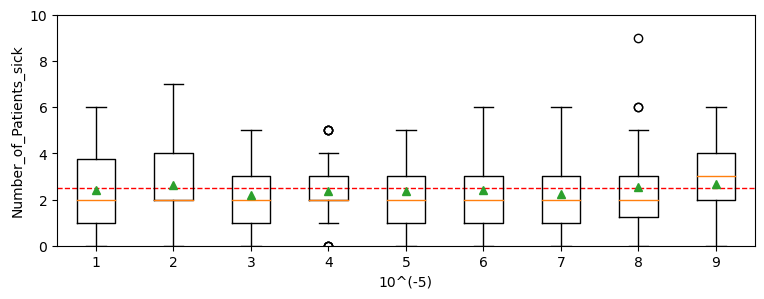

In [90]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (9, 3)
plt.rcParams['font.size'] = 10



# 3. 그래프 그리기
fig, ax = plt.subplots()

plt.axhline(2.5, 0, 1, color='red', linestyle='--', linewidth=1)

violin = ax.boxplot([data_a[0], data_a[1], data_a[2], data_a[3], data_a[4], data_a[5], data_a[6], data_a[7], data_a[8]], showmeans=True)
ax.set_ylim(0, 10.0)
ax.set_xticks(np.arange(1, 10))
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax.set_xlabel('10^(-5)')
ax.set_ylabel('Number_of_Patients_sick')


plt.show()

In [5]:
refine_data = pd.read_csv('refinement.csv')
refine_data.head()

,0.00001,0.00002,0.00003,0.00004,0.00005,0.00006,0.00007,0.00008,0.00009,0.0001
0,1,0,2,5,0,1,1,3,2,2
1,0,2,4,1,0,1,3,1,2,1
2,3,2,2,2,5,2,2,6,6,4
3,2,5,2,2,4,1,1,4,1,3
4,2,5,4,2,5,2,2,2,4,2


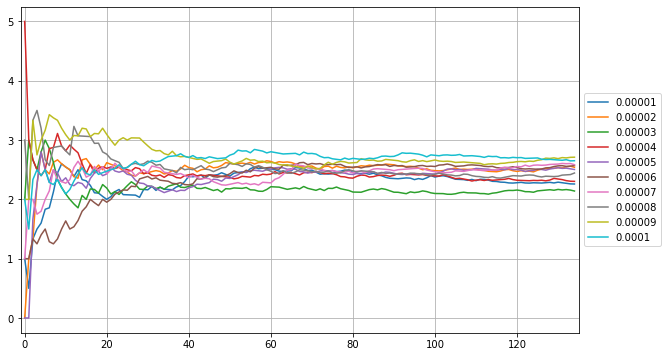

In [22]:
c1 = refine_data.expanding().mean()
fig = c1.plot(figsize = (10,6),grid = True,xlim= (-1,135))
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

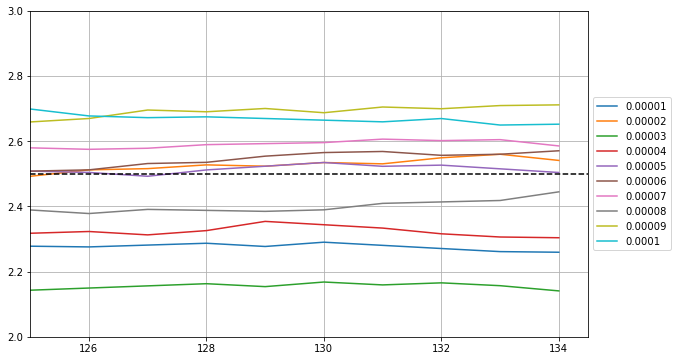

In [32]:

fig2 = c1.plot(figsize = (10,6),grid = True,xlim= (125,134.5),ylim = (2,3))
fig2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig2.axhline(y = 2.5, color = 'black',linestyle = '--')